In [1]:
from deconvtest import Step
from deconvtest import Workflow

import numpy as np
import pandas as pd
from skimage import io
import pylab as plt

In [2]:
w = Workflow()
w.load('workflow.json')
w

{
    "name": "test workflow",
    "path": "workflow.json",
    "output path": "test_workflow",
    "steps": [
        {
            "name": "GroundTruth",
            "number of inputs": 0,
            "number of outputs": 1,
            "method": "ellipsoid",
            "parameter_path": "params_ellipsoid.csv",
            "number of parameter combinations": 2,
            "input step": []
        },
        {
            "name": "PSF",
            "number of inputs": 0,
            "number of outputs": 1,
            "method": "gaussian",
            "parameter_path": "params_psf.csv",
            "number of parameter combinations": 6,
            "input step": []
        },
        {
            "name": "Convolution",
            "number of inputs": 2,
            "number of outputs": 1,
            "method": "convolve",
            "parameter_path": null,
            "number of parameter combinations": 0,
            "input step": [
                0,
                1
          

In [3]:
w.get_workflow_graph()

{'name': 'workflow_graph',
 'items': [{'name': 'item000',
   'steps': [{'name': 'GroundTruth',
     'method': 'ellipsoid',
     'theta': 1.5707963267948966,
     'phi': 4.188790204786391,
     'size': [10.0, 6.0, 6.0],
     'voxel_size': [0.5, 0.2, 0.2],
     'outputID': 'GT0000'},
    {'name': 'GroundTruth',
     'method': 'ellipsoid',
     'theta': 1.5707963267948966,
     'phi': 4.188790204786391,
     'size': [10.0, 6.0, 6.0],
     'voxel_size': [0.5, 0.2, 0.2],
     'outputID': 'GT0000'},
    {'name': 'PSF',
     'method': 'gaussian',
     'sigma': 1,
     'aspect': 3,
     'voxel_size': 1.0,
     'outputID': 'PSF0000'},
    {'name': 'Convolution',
     'method': 'convolve',
     'outputID': 'GT0000_PSF0000',
     'inputIDs': ['GT0000', 'PSF0000']},
    {'name': 'Transform',
     'method': 'poisson_noise',
     'snr': 2,
     'outputID': 'GT0000_PSF0000_noise0000',
     'inputIDs': ['GT0000_PSF0000']},
    {'name': 'Evaluation',
     'method': 'rmse',
     'outputID': 'GT0000_vs_G

In [4]:
 w.workflow['items'][10]

{'name': 'item010',
 'steps': [{'name': 'GroundTruth',
   'method': 'ellipsoid',
   'theta': 1.5707963267948966,
   'phi': 4.188790204786391,
   'size': [10.0, 6.0, 6.0],
   'voxel_size': [0.5, 0.2, 0.2],
   'outputID': 'GT0000'},
  {'name': 'GroundTruth',
   'method': 'ellipsoid',
   'theta': 1.5707963267948966,
   'phi': 4.188790204786391,
   'size': [10.0, 6.0, 6.0],
   'voxel_size': [0.5, 0.2, 0.2],
   'outputID': 'GT0000'},
  {'name': 'PSF',
   'method': 'gaussian',
   'sigma': 2,
   'aspect': 3,
   'voxel_size': 1.0,
   'outputID': 'PSF0003'},
  {'name': 'Convolution',
   'method': 'convolve',
   'outputID': 'GT0000_PSF0003',
   'inputIDs': ['GT0000', 'PSF0003']},
  {'name': 'Transform',
   'method': 'poisson_noise',
   'snr': 5,
   'outputID': 'GT0000_PSF0003_noise0001',
   'inputIDs': ['GT0000_PSF0003']},
  {'name': 'Evaluation',
   'method': 'rmse',
   'outputID': 'GT0000_vs_GT0000_PSF0003_noise0001',
   'inputIDs': ['GT0000', 'GT0000_PSF0003_noise0001']}]}

In [5]:
w.run()

Run run_item
Started at  Thu Jul 29 13:39:43 2021
done 1 of 72 ( 1.3888888888888888 % ), approx. time left:  39.51513648033142 sec
done 2 of 72 ( 2.7777777777777777 % ), approx. time left:  21.435787677764893 sec
done 3 of 72 ( 4.166666666666667 % ), approx. time left:  14.115147352218628 sec
done 4 of 72 ( 5.555555555555555 % ), approx. time left:  10.45528793334961 sec
done 5 of 72 ( 6.944444444444445 % ), approx. time left:  8.243722105026245 sec
done 6 of 72 ( 8.333333333333334 % ), approx. time left:  7.513958215713501 sec
done 7 of 72 ( 9.722222222222221 % ), approx. time left:  6.3678291865757535 sec
done 8 of 72 ( 11.11111111111111 % ), approx. time left:  5.997800827026367 sec
done 9 of 72 ( 12.5 % ), approx. time left:  7.954834938049316 sec
done 10 of 72 ( 13.88888888888889 % ), approx. time left:  7.4467216491699215 sec
done 11 of 72 ( 15.277777777777779 % ), approx. time left:  6.686405311931264 sec
done 12 of 72 ( 16.666666666666668 % ), approx. time left:  6.342415809631

/opt/anaconda3/envs/deconvtest/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


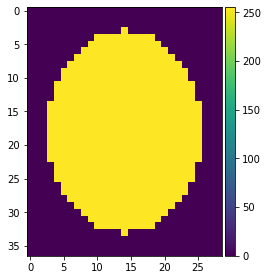

In [6]:
io.imshow(io.imread('test_workflow/GT0000.tif').max(1))

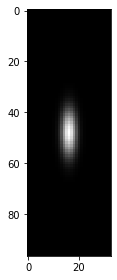

In [7]:
io.imshow(io.imread('test_workflow/PSF0003.tif').max(1))

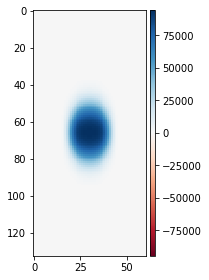

In [8]:
io.imshow(io.imread('test_workflow/GT0000_PSF0003.tif').max(1))

/opt/anaconda3/envs/deconvtest/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


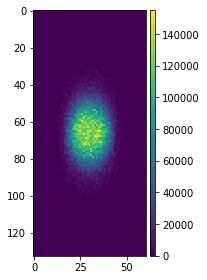

In [9]:
io.imshow(io.imread('test_workflow/GT0000_PSF0003_noise0001.tif').max(1))

In [10]:
pd.read_csv('test_workflow/GT0000_vs_GT0000_PSF0003_noise0001.csv')

,OutputID,rmse
0,GT0000_vs_GT0000_PSF0003_noise0001,39109.654594
